In [1]:
from config_figures import *

# Spider plots

In [2]:
median_list = []
biome_names = []
for biome in [3,1,2,6,5,4,12]:

    if biome == 1:
        df = pd.concat([pd.read_csv(google_drive_path + '/ecoregions_stats_v2_biome_' + str(biome) + '_chunk_' + str(i) + '_outof_5.csv') for i in range(5)])
    else:
        df = pd.read_csv(google_drive_path + '/ecoregions_stats_v2_biome_' + str(biome) + '.csv' )
        
    df['turnover'] = (1- ((df.n_present - df.n_lost) / (df.n_present + df.n_gained))) * 100 # (1 - Jaccard_index) * 100
    df['frac_lost'] = df['n_lost'] / df['n_present'] * 100
    median_series = df.drop(['system:index','BIOME_NAME','BIOME_NUM','ECO_ID','ECO_NAME','REALM','.geo'], axis=1).median(axis=0, numeric_only=True)
    median_series.name = "{}) {} (n_eco={})".format(df['BIOME_NUM'].iloc[0], df['BIOME_NAME'].iloc[0], df.shape[0]) 
    median_list.append(median_series)

df_median = pd.concat(median_list, axis=1).T
df_median['biome_name'] = [
    'Tropical coniferous forests', 'Tropical moist broadleaf forests', 'Tropical dry broadleaf forests',
    'Boreal forests', 'Temperate conifer forests', 'Temperate broadleaf forests', 'Mediterranenan forests' 
]
df_median

,abs_latitude_shift,elevation_shift,latitude_shift,n_future,n_gained,n_lost,n_present,pos_elevation_shift,turnover,frac_lost,biome_name
3.0) Tropical & Subtropical Coniferous Forests (n_eco=15),1.127862,34.687451,-0.027753,1309.0,40.0,77.0,1459.0,32.771066,12.108680,8.000998,Tropical coniferous forests
1.0) Tropical & Subtropical Moist Broadleaf Forests (n_eco=230),1.268841,4.516270,-0.147381,762.5,26.0,42.5,819.5,12.431565,9.040614,5.080493,Tropical moist broadleaf forests
2.0) Tropical & Subtropical Dry Broadleaf Forests (n_eco=56),1.254672,4.447121,-0.234587,1032.0,27.5,177.0,1215.0,13.163033,16.129032,14.180479,Tropical dry broadleaf forests
6.0) Boreal Forests/Taiga (n_eco=26),6.002923,-1.947184,6.002602,106.0,47.0,1.0,48.0,0.001464,46.076172,1.049451,Boreal forests
5.0) Temperate Conifer Forests (n_eco=47),4.002123,31.409943,4.002123,273.0,51.0,11.0,210.0,31.821971,28.020566,4.371585,Temperate conifer forests
4.0) Temperate Broadleaf & Mixed Forests (n_eco=83),3.632706,2.704764,3.499902,238.0,24.0,16.0,194.0,6.409561,19.519095,7.309487,Temperate broadleaf forests
"12.0) Mediterranean Forests, Woodlands & Scrub (n_eco=40)",2.701168,-39.976610,2.435265,176.5,5.0,27.5,196.5,0.005449,19.067727,11.704613,Mediterranenan forests


In [3]:
df_median = df_median.set_index('biome_name')
df_median

,abs_latitude_shift,elevation_shift,latitude_shift,n_future,n_gained,n_lost,n_present,pos_elevation_shift,turnover,frac_lost
biome_name,,,,,,,,,,
Tropical coniferous forests,1.127862,34.687451,-0.027753,1309.0,40.0,77.0,1459.0,32.771066,12.108680,8.000998
Tropical moist broadleaf forests,1.268841,4.516270,-0.147381,762.5,26.0,42.5,819.5,12.431565,9.040614,5.080493
Tropical dry broadleaf forests,1.254672,4.447121,-0.234587,1032.0,27.5,177.0,1215.0,13.163033,16.129032,14.180479
Boreal forests,6.002923,-1.947184,6.002602,106.0,47.0,1.0,48.0,0.001464,46.076172,1.049451
Temperate conifer forests,4.002123,31.409943,4.002123,273.0,51.0,11.0,210.0,31.821971,28.020566,4.371585
Temperate broadleaf forests,3.632706,2.704764,3.499902,238.0,24.0,16.0,194.0,6.409561,19.519095,7.309487
Mediterranenan forests,2.701168,-39.976610,2.435265,176.5,5.0,27.5,196.5,0.005449,19.067727,11.704613


In [4]:
# normalize by the maximum value to rescale to values from 0 to max for each column
# df_norm = df_median / df_median.max()
# min-max normalisation
df_norm = (df_median - df_median.min()) / (df_median.max() - df_median.min())
df_norm

,abs_latitude_shift,elevation_shift,latitude_shift,n_future,n_gained,n_lost,n_present,pos_elevation_shift,turnover,frac_lost
biome_name,,,,,,,,,,
Tropical coniferous forests,0.000000,1.000000,0.033161,1.000000,0.760870,0.431818,1.000000,1.000000,0.082841,0.529399
Tropical moist broadleaf forests,0.028919,0.595908,0.013982,0.545719,0.456522,0.235795,0.546775,0.379318,0.000000,0.306986
Tropical dry broadleaf forests,0.026012,0.594981,0.000000,0.769742,0.489130,1.000000,0.827073,0.401640,0.191395,1.000000
Boreal forests,1.000000,0.509340,1.000000,0.000000,0.913043,0.000000,0.000000,0.000000,1.000000,0.000000
Temperate conifer forests,0.589585,0.956103,0.679266,0.138820,1.000000,0.056818,0.114812,0.971037,0.512479,0.252999
Temperate broadleaf forests,0.513808,0.571645,0.598746,0.109726,0.413043,0.085227,0.103473,0.195550,0.282930,0.476736
Mediterranenan forests,0.322725,0.000000,0.428054,0.058603,0.000000,0.150568,0.105245,0.000122,0.270743,0.811449


In [5]:
categories = ['n_present', 'frac_lost', 'turnover', 'abs_latitude_shift', 'elevation_shift']
categories = [*categories, categories[0]]
print(categories)

cat_names = ['nb species', 'lost species', 'species turnover', 'latitude shift', 'elevation shift']
cat_names = [*cat_names, cat_names[0]]
print(cat_names)

cat_units = ['', '%', '%', '°', 'm']
cat_units = [*cat_units, cat_units[0]]
print(cat_units)

['n_present', 'frac_lost', 'turnover', 'abs_latitude_shift', 'elevation_shift', 'n_present']
['nb species', 'lost species', 'species turnover', 'latitude shift', 'elevation shift', 'nb species']
['', '%', '%', '°', 'm', '']


In [6]:
["{} = {}{}".format(cn, int(df_median.loc[df_line[0], c]), cu) for c, cn, cu in zip(categories, cat_names, cat_units)]


NameError: name 'df_line' is not defined

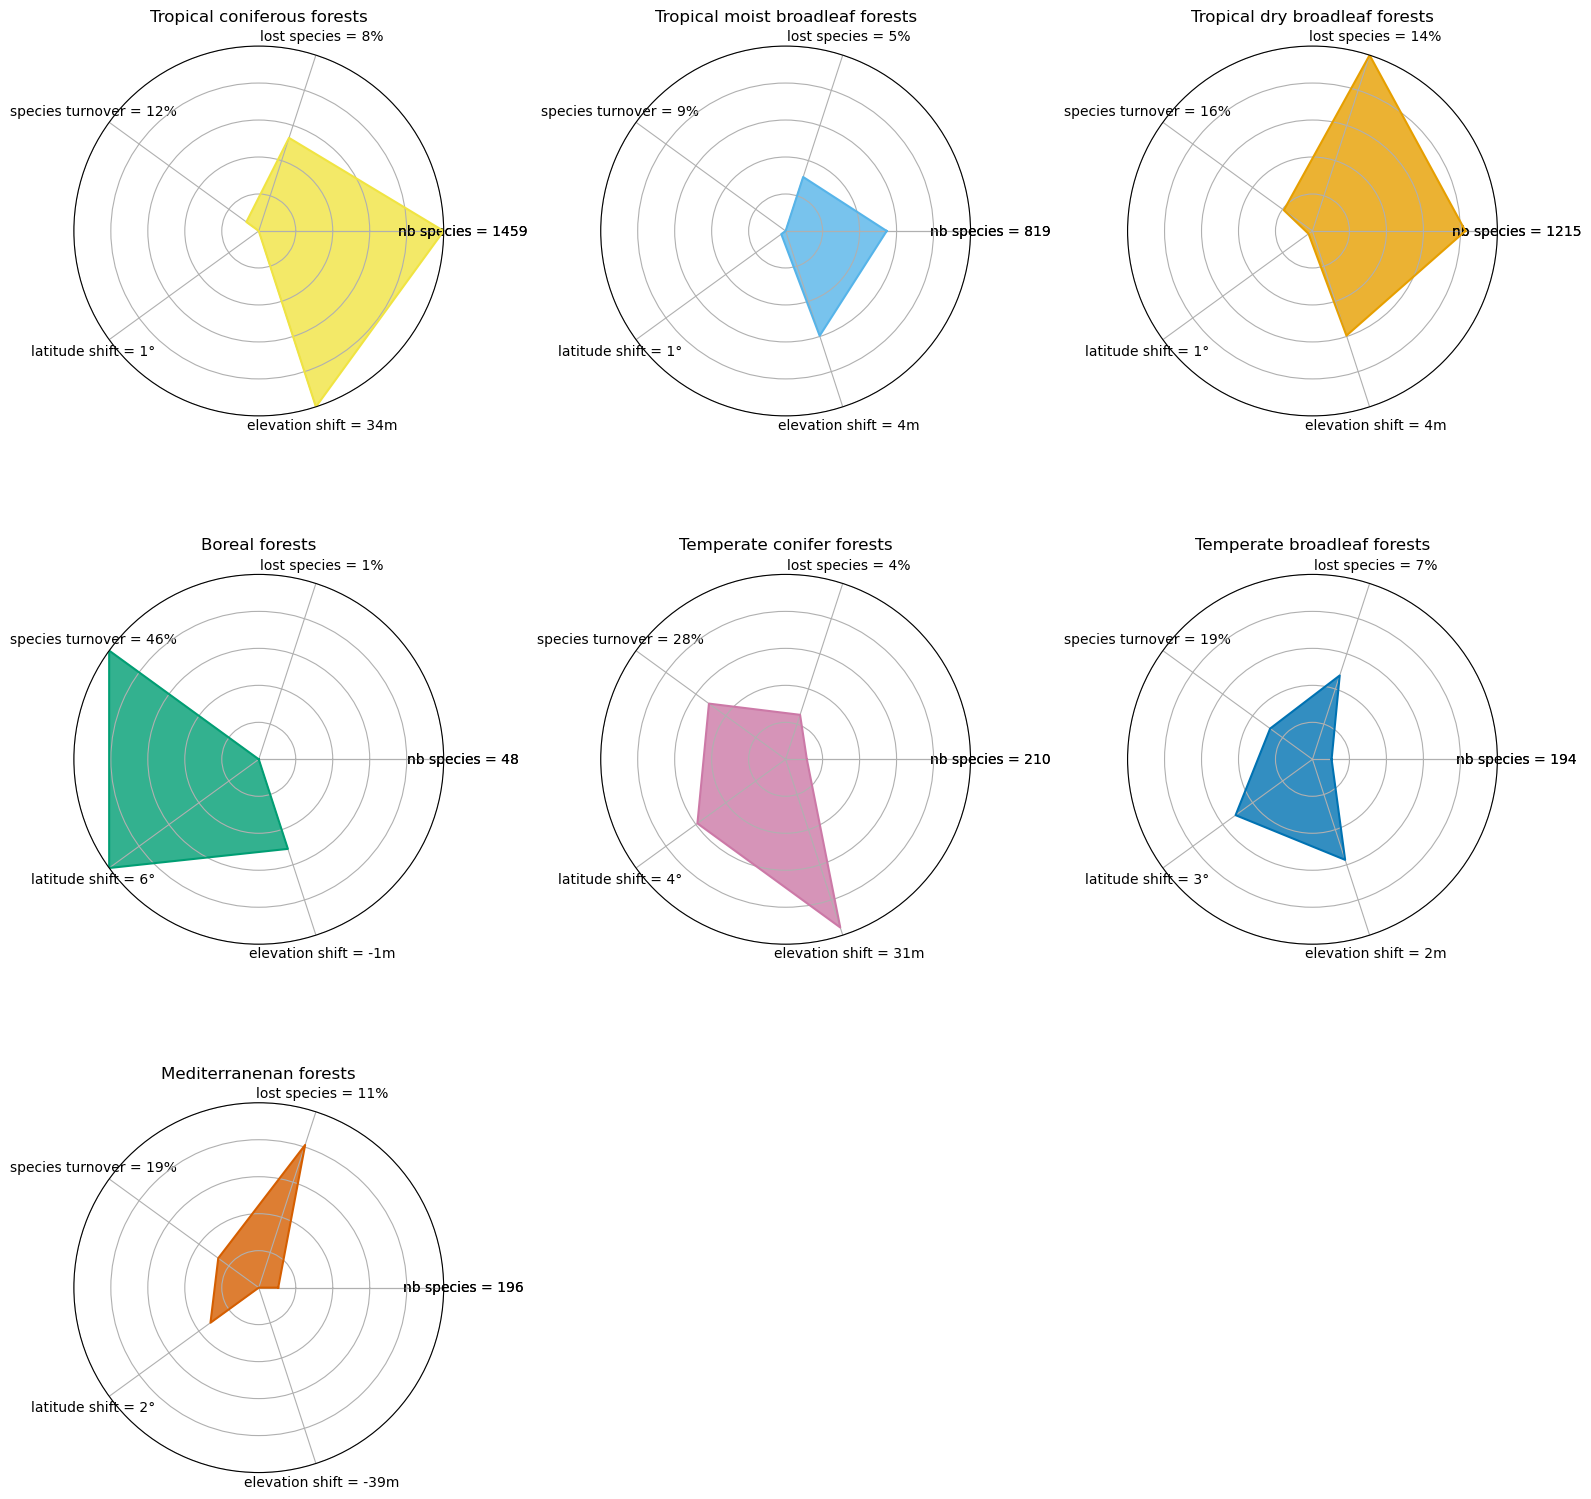

In [7]:
df_lines = [l for l in df_norm.iterrows()]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
colors = ['#F0E442', '#56B4E9', '#E69F00', '#009E73', '#CC79A7', '#0072B2', '#D55E00']
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(16,16), subplot_kw=dict(projection='polar'))#, constrained_layout=True)#, layout='constrained')

for ax, df_line, color in zip(axs.flat[0:len(df_lines)], df_lines, colors):
    vals = list(df_line[1][categories])

    ax.plot(label_loc, vals, label=df_line[0], c=color) #list(df_line[1][categories]), label=df_line[0], c=colors[i])
    ax.fill(label_loc, vals, facecolor=color, alpha=0.8, label='_nolegend_')

    cat_labels = ["{} = {}{}".format(cn, int(df_median.loc[df_line[0], c]), cu) for c, cn, cu in zip(categories, cat_names, cat_units)]
    # cat_labels = cat_names
    ax.set_thetagrids(np.degrees(label_loc), labels=cat_labels)
    
    ax.set_title(df_line[0])
    ax.set_ylim(0,1)
    ax.yaxis.set_ticklabels([])

for ax in axs.flat:
    if not bool(ax.has_data()): fig.delaxes(ax) ## delete if nothing is plotted in the axes obj

plt.tight_layout()


In [8]:
df_list = []
for biome in [3,1,2,6,5,4,12]:

    if biome == 1:
        df = pd.concat([pd.read_csv(google_drive_path + '/ecoregions_stats_v2_biome_' + str(biome) + '_chunk_' + str(i) + '_outof_5.csv') for i in range(5)])
    else:
        df = pd.read_csv(google_drive_path + '/ecoregions_stats_v2_biome_' + str(biome) + '.csv' )
        
    df['turnover'] = (1- ((df.n_present - df.n_lost) / (df.n_present + df.n_gained))) * 100 # (1 - Jaccard_index) * 100
    df['frac_lost'] = df['n_lost'] / df['n_present'] * 100
    df_list.append(df)

df_eco = pd.concat(df_list).drop(['system:index', 'REALM', '.geo'], axis=1).reset_index(drop=True)
df_eco

,BIOME_NAME,BIOME_NUM,ECO_ID,ECO_NAME,abs_latitude_shift,elevation_shift,latitude_shift,n_future,n_gained,n_lost,n_present,pos_elevation_shift,turnover,frac_lost
0,Tropical & Subtropical Coniferous Forests,3.0,303,Luzon tropical pine forests,1.480225,2.412819,1.146991,750,9,41,782,0.130527,6.321113,5.242967
1,Tropical & Subtropical Coniferous Forests,3.0,304,Northeast India-Myanmar pine forests,1.486806,2.471130,1.371576,612,20,120,712,0.172047,19.125683,16.853933
2,Tropical & Subtropical Coniferous Forests,3.0,305,Sumatran tropical pine forests,1.012247,3.569928,-0.155856,534,40,28,522,0.067577,12.099644,5.363985
3,Tropical & Subtropical Coniferous Forests,3.0,302,Himalayan subtropical pine forests,1.486365,2.197965,1.369144,650,35,65,680,0.176699,13.986014,9.558824
4,Tropical & Subtropical Coniferous Forests,3.0,556,Sierra de la Laguna pine-oak forests,0.860494,72.217503,0.605677,451,113,78,416,72.217503,36.105860,18.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,"Mediterranean Forests, Woodlands & Scrub",12.0,422,California coastal sage and chaparral,0.854646,67.810005,0.601772,627,60,79,646,64.173247,19.688385,12.229102
493,"Mediterranean Forests, Woodlands & Scrub",12.0,795,Italian sclerophyllous and semi-deciduous forests,4.794860,-59.923142,4.876667,178,1,5,182,0.005799,3.278689,2.747253
494,"Mediterranean Forests, Woodlands & Scrub",12.0,785,Aegean and Western Turkey sclerophyllous and m...,4.794860,-40.586703,4.686674,199,1,4,202,0.024178,2.463054,1.980198
495,"Mediterranean Forests, Woodlands & Scrub",12.0,791,Eastern Mediterranean conifer-broadleaf forests,3.249024,-64.713594,3.041497,120,1,80,199,0.037075,40.500000,40.201005


In [9]:
categories = ['n_present', 'frac_lost', 'turnover', 'abs_latitude_shift', 'elevation_shift']
cats = [c + '_norm' for c in categories]
cat_names = ['nb species', 'lost species', 'species turnover', 'latitude shift', 'elevation shift']
cat_units = ['', '%', '%', '°', 'm']

In [10]:
df_norm = (df_eco[categories] - df_eco[categories].min()) / (df_eco[categories].max() - df_eco[categories].min())
df_eco = df_eco.join(df_norm.add_suffix('_norm'))
df_eco

,BIOME_NAME,BIOME_NUM,ECO_ID,ECO_NAME,abs_latitude_shift,elevation_shift,latitude_shift,n_future,n_gained,n_lost,n_present,pos_elevation_shift,turnover,frac_lost,n_present_norm,frac_lost_norm,turnover_norm,abs_latitude_shift_norm,elevation_shift_norm
0,Tropical & Subtropical Coniferous Forests,3.0,303,Luzon tropical pine forests,1.480225,2.412819,1.146991,750,9,41,782,0.130527,6.321113,5.242967,0.231772,0.096793,0.080744,0.153717,0.459081
1,Tropical & Subtropical Coniferous Forests,3.0,304,Northeast India-Myanmar pine forests,1.486806,2.471130,1.371576,612,20,120,712,0.172047,19.125683,16.853933,0.211025,0.311150,0.244306,0.154774,0.459332
2,Tropical & Subtropical Coniferous Forests,3.0,305,Sumatran tropical pine forests,1.012247,3.569928,-0.155856,534,40,28,522,0.067577,12.099644,5.363985,0.154713,0.099027,0.154557,0.078555,0.464067
3,Tropical & Subtropical Coniferous Forests,3.0,302,Himalayan subtropical pine forests,1.486365,2.197965,1.369144,650,35,65,680,0.176699,13.986014,9.558824,0.201541,0.176471,0.178653,0.154703,0.458155
4,Tropical & Subtropical Coniferous Forests,3.0,556,Sierra de la Laguna pine-oak forests,0.860494,72.217503,0.605677,451,113,78,416,72.217503,36.105860,18.750000,0.123296,0.346154,0.461206,0.054182,0.759867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,"Mediterranean Forests, Woodlands & Scrub",12.0,422,California coastal sage and chaparral,0.854646,67.810005,0.601772,627,60,79,646,64.173247,19.688385,12.229102,0.191464,0.225768,0.251494,0.053243,0.740875
493,"Mediterranean Forests, Woodlands & Scrub",12.0,795,Italian sclerophyllous and semi-deciduous forests,4.794860,-59.923142,4.876667,178,1,5,182,0.005799,3.278689,2.747253,0.053942,0.050719,0.041881,0.686079,0.190477
494,"Mediterranean Forests, Woodlands & Scrub",12.0,785,Aegean and Western Turkey sclerophyllous and m...,4.794860,-40.586703,4.686674,199,1,4,202,0.024178,2.463054,1.980198,0.059870,0.036558,0.031462,0.686079,0.273797
495,"Mediterranean Forests, Woodlands & Scrub",12.0,791,Eastern Mediterranean conifer-broadleaf forests,3.249024,-64.713594,3.041497,120,1,80,199,0.037075,40.500000,40.201005,0.058980,0.742172,0.517336,0.437803,0.169835


In [11]:
df_biome.iloc[0]['BIOME_NAME']

NameError: name 'df_biome' is not defined

15 0.13333333333333333
230 0.008695652173913044
56 0.03571428571428571
26 0.07692307692307693
47 0.0425531914893617
83 0.024096385542168676
40 0.05


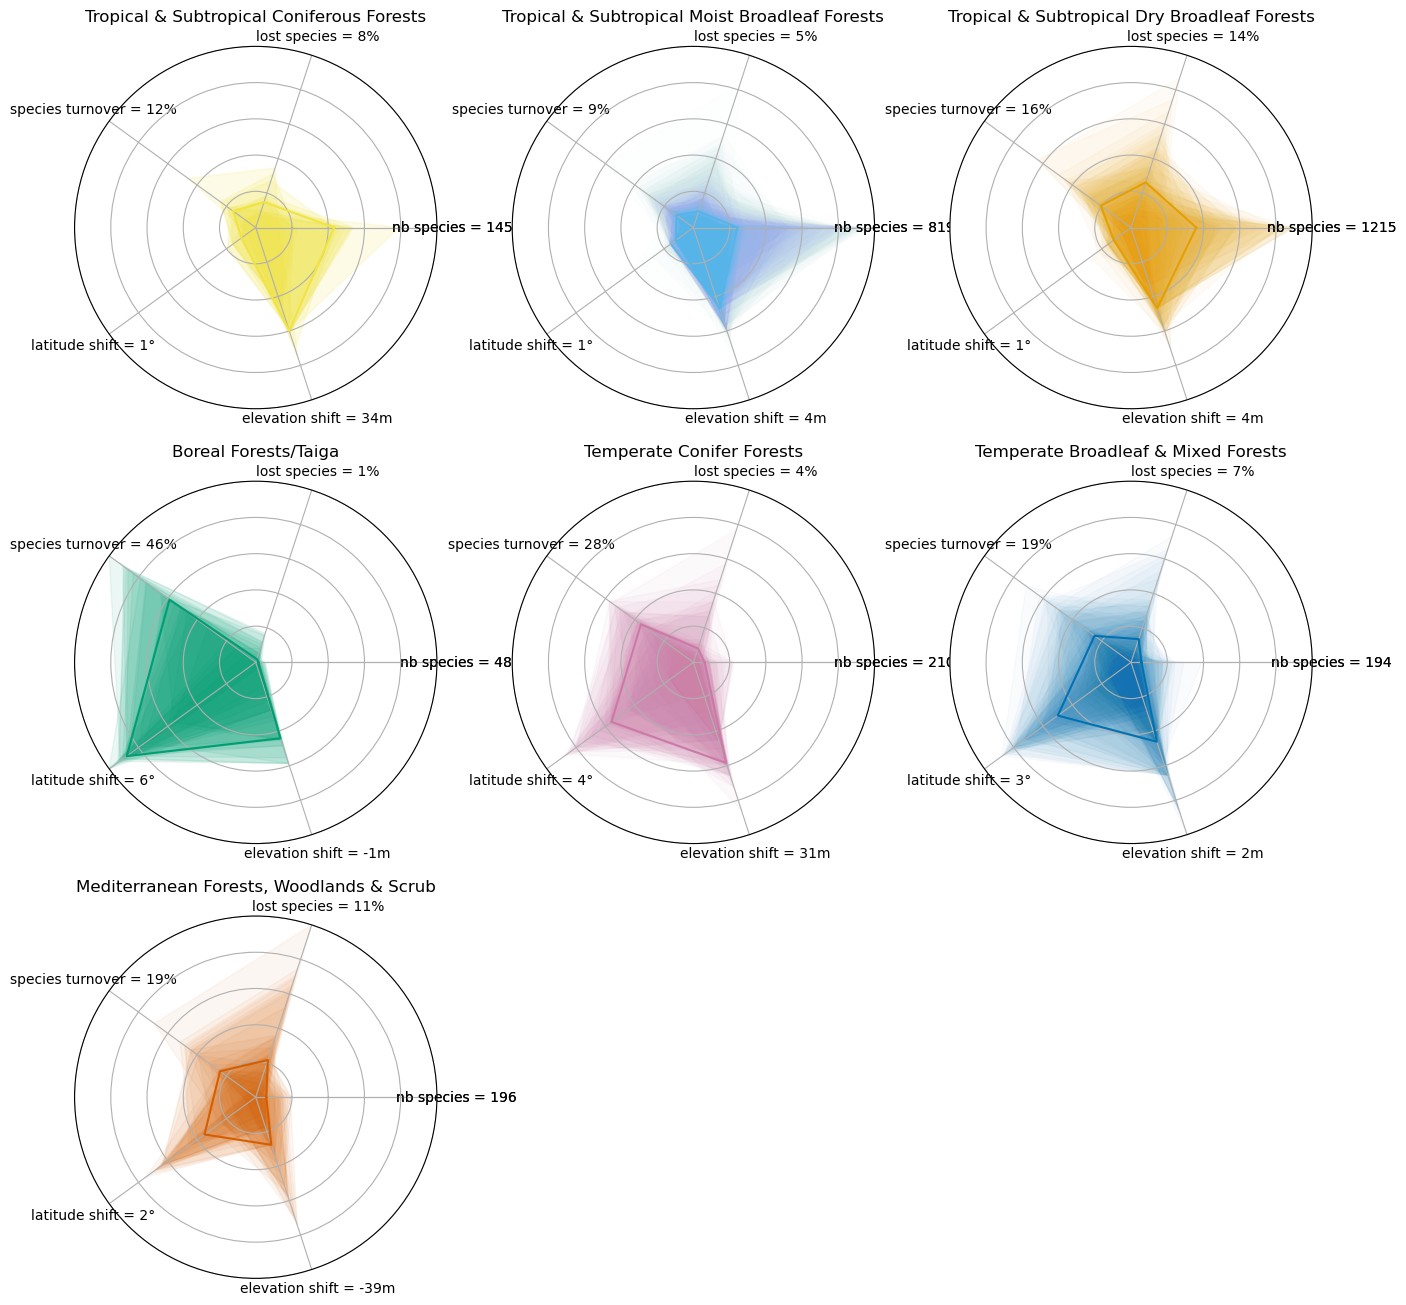

In [12]:
biomes = df_eco['BIOME_NUM'].unique().tolist()
colors = ['#F0E442', '#56B4E9', '#E69F00', '#009E73', '#CC79A7', '#0072B2', '#D55E00']
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(16,16), subplot_kw=dict(projection='polar'))

for ax, biome, color in zip(axs.flat[0:len(biomes)], biomes, colors):
    df_biome = df_eco[df_eco['BIOME_NUM']==biome]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(cats)+1)
    n_eco = df_biome.shape[0]
    print(n_eco, 2/n_eco)

    for l in df_biome.iterrows():
        vals = list(l[1][cats])
        vals = [*vals, vals[0]]
        ax.fill(label_loc, vals, alpha=2/n_eco, label='_nolegend_', color=color)

    biome_median_norm = df_biome[cats].median()
    biome_median_vals = [*biome_median_norm, biome_median_norm[0]]
    ax.plot(label_loc, biome_median_vals, label=df_line[0], color=color) 

    cat_labels = [f"{cn} = {int(df_biome[c].median())}{cu}" for c, cn, cu in  zip(categories, cat_names, cat_units)]
    cat_labels = [*cat_labels, cat_labels[0]]
    ax.set_thetagrids(np.degrees(label_loc), labels=cat_labels)

    ax.set_title(df_biome.iloc[0]['BIOME_NAME'])
    ax.set_ylim(0,1)
    ax.yaxis.set_ticklabels([])

for ax in axs.flat:
    if not bool(ax.has_data()): fig.delaxes(ax) # delete if nothing is plotted in the axes obj

plt.show()
